In [2]:
import pandas as pd
import numpy as np

# Load original dataset
df = pd.read_csv("/content/india_housing_prices.csv")

df.head()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [3]:
df = df.drop_duplicates()


In [4]:
df = df.fillna(df.median(numeric_only=True))

for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])


In [5]:
df["Price_per_SqFt"] = df["Price_in_Lakhs"] * 100000 / df["Size_in_SqFt"]
df["Age_of_Property"] = 2024 - df["Year_Built"]


In [6]:
median_price = df["Price_in_Lakhs"].median()
df["Good_Investment"] = (df["Price_in_Lakhs"] <= median_price).astype(int)


In [7]:
df["Future_Price"] = df["Price_in_Lakhs"] * (1.08 ** 5)


In [8]:
df.to_csv("cleaned_data.csv", index=False)
print("STEP 1 COMPLETED: Cleaned data saved!")


STEP 1 COMPLETED: Cleaned data saved!


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_data.csv")


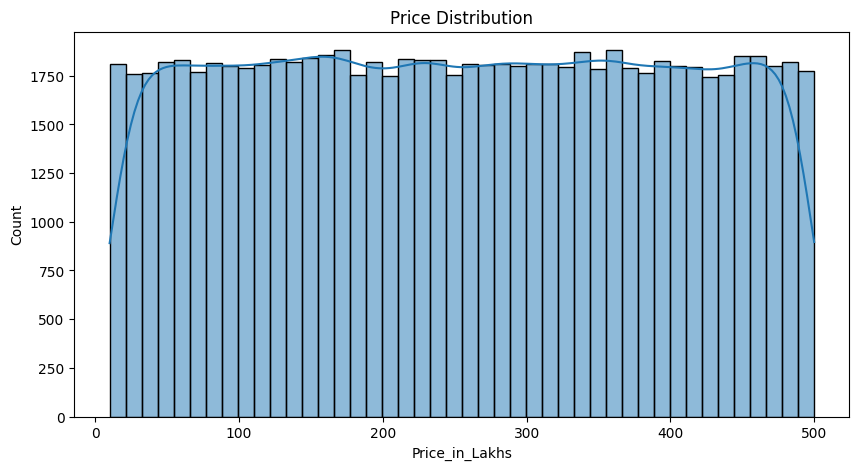

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price_in_Lakhs'], kde=True)
plt.title("Price Distribution")
plt.show()


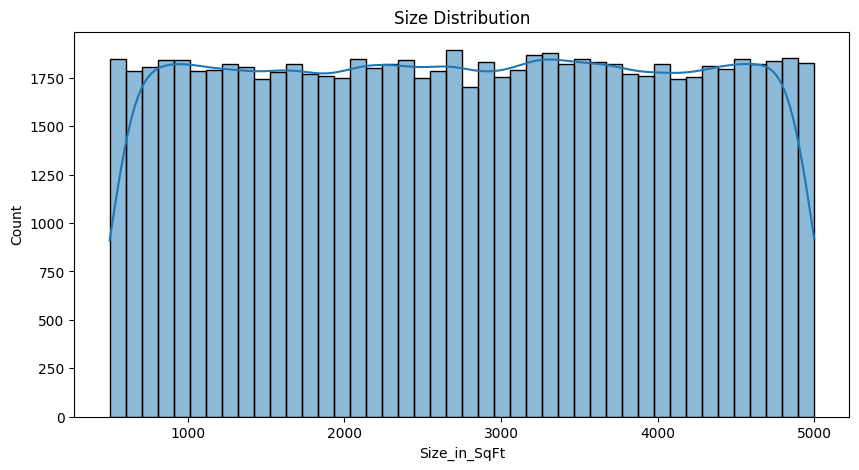

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Size_in_SqFt'], kde=True)
plt.title("Size Distribution")
plt.show()


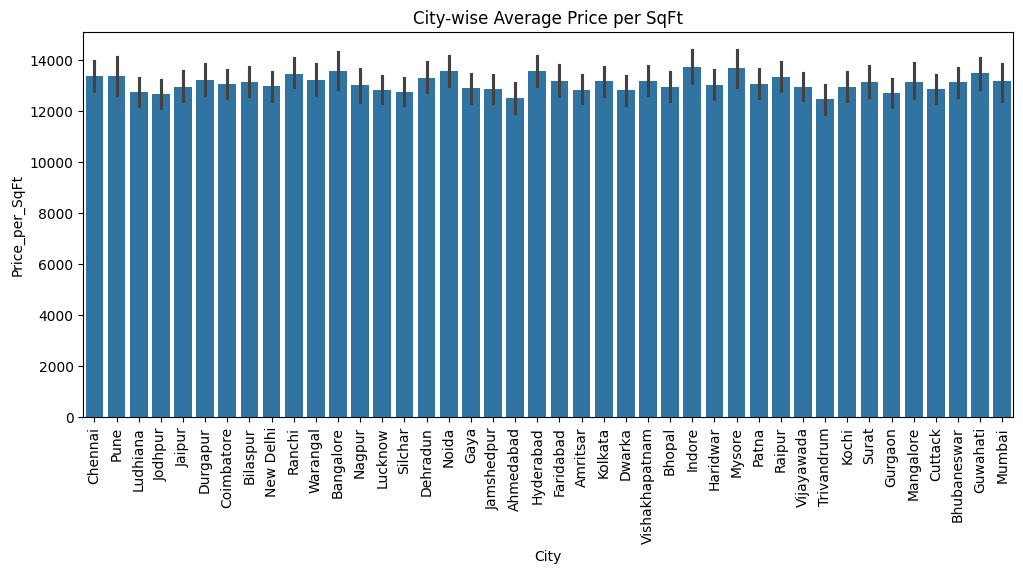

In [12]:
plt.figure(figsize=(12,5))
sns.barplot(x='City', y='Price_per_SqFt', data=df)
plt.xticks(rotation=90)
plt.title("City-wise Average Price per SqFt")
plt.show()


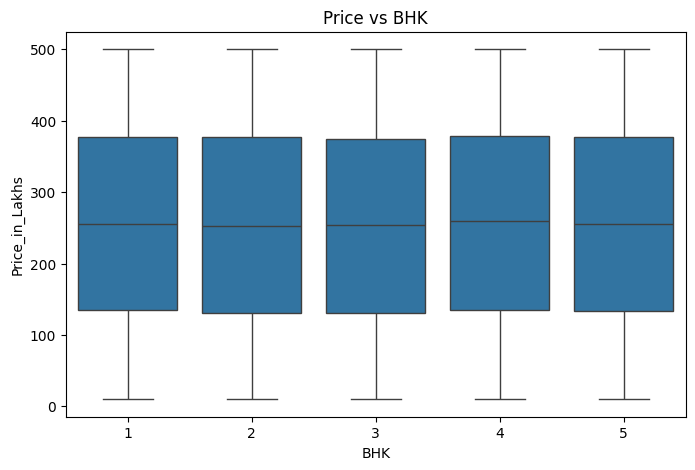

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='BHK', y='Price_in_Lakhs', data=df)
plt.title("Price vs BHK")
plt.show()


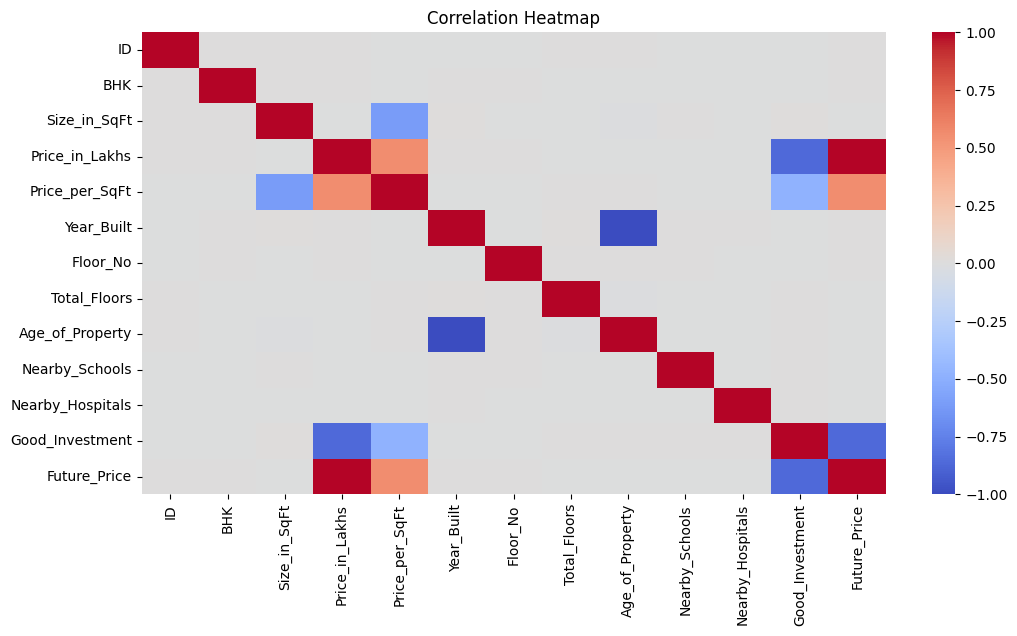

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


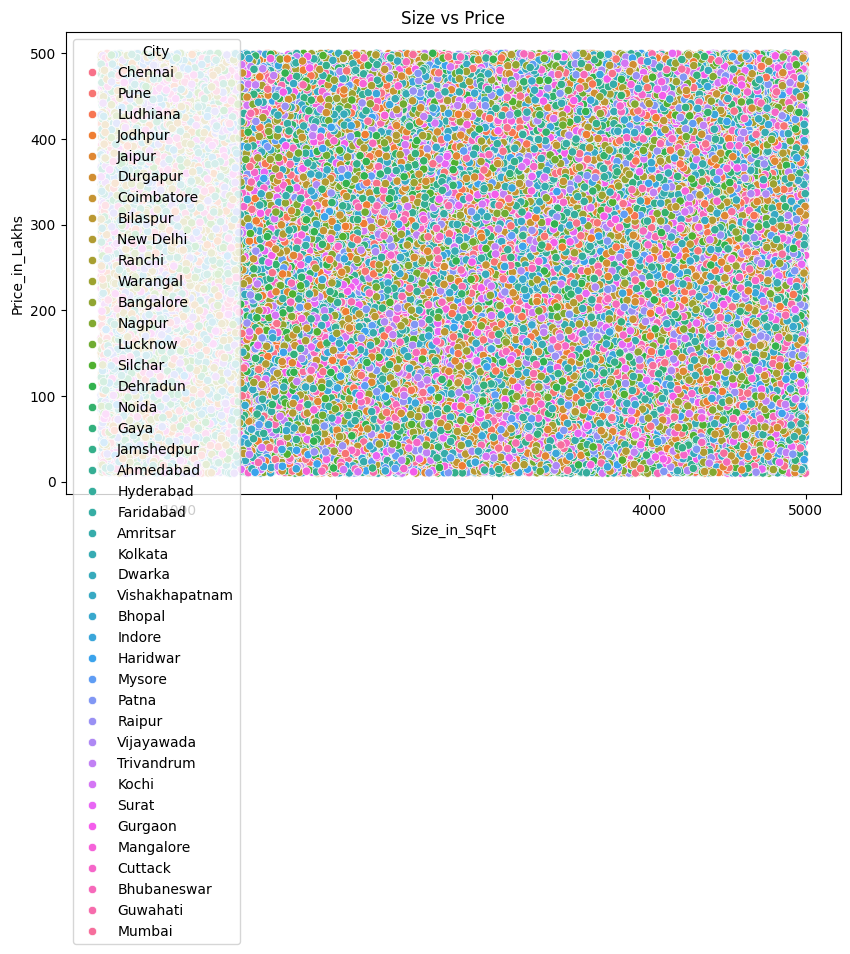

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Size_in_SqFt", y="Price_in_Lakhs", hue="City", data=df)
plt.title("Size vs Price")
plt.show()


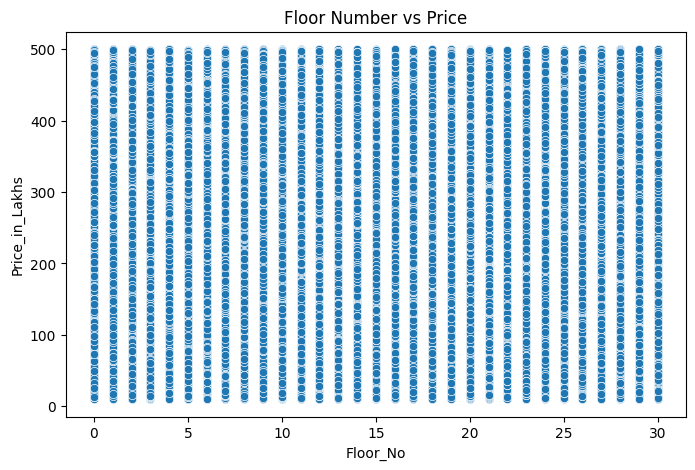

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Floor_No', y='Price_in_Lakhs', data=df)
plt.title("Floor Number vs Price")
plt.show()


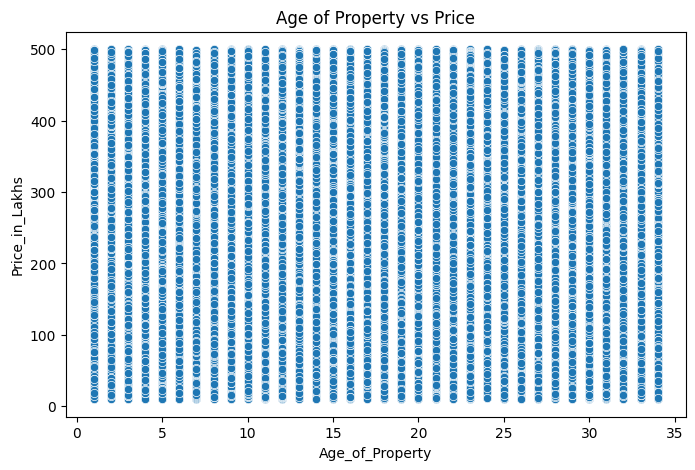

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age_of_Property', y='Price_in_Lakhs', data=df)
plt.title("Age of Property vs Price")
plt.show()


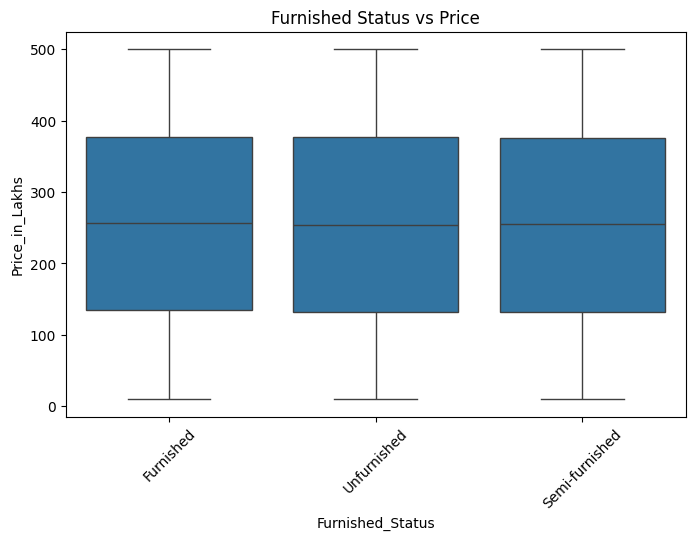

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Furnished_Status', y='Price_in_Lakhs', data=df)
plt.title("Furnished Status vs Price")
plt.xticks(rotation=45)
plt.show()


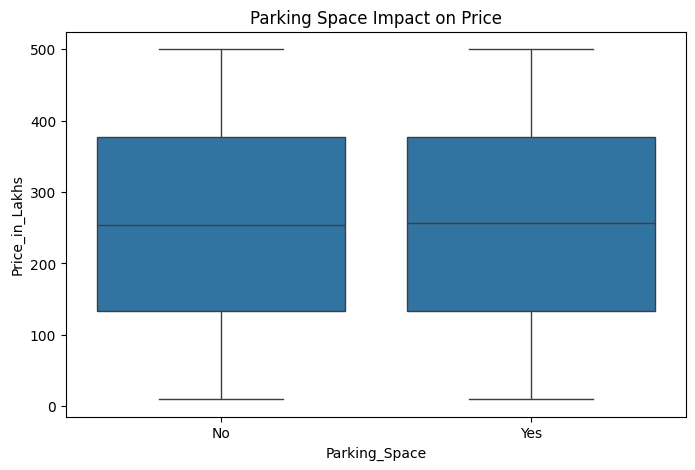

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Parking_Space', y='Price_in_Lakhs', data=df)
plt.title("Parking Space Impact on Price")
plt.show()


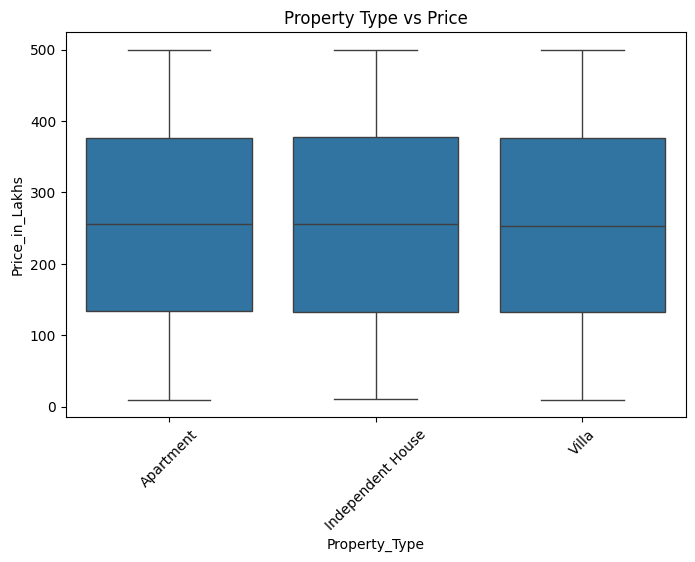

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Property_Type', y='Price_in_Lakhs', data=df)
plt.title("Property Type vs Price")
plt.xticks(rotation=45)
plt.show()


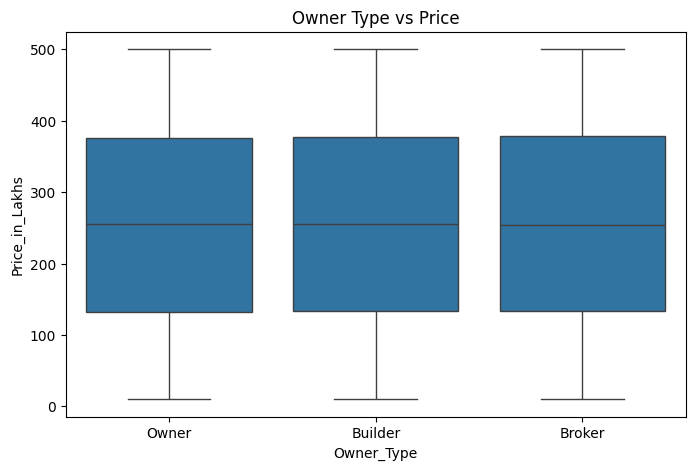

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Owner_Type', y='Price_in_Lakhs', data=df)
plt.title("Owner Type vs Price")
plt.show()


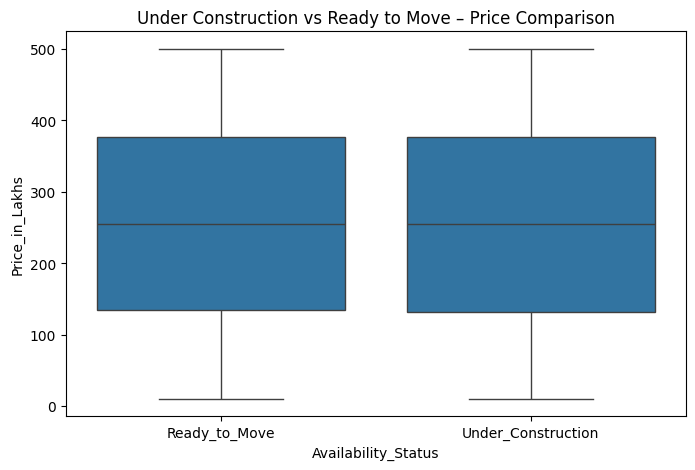

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Availability_Status', y='Price_in_Lakhs', data=df)
plt.title("Under Construction vs Ready to Move – Price Comparison")
plt.show()


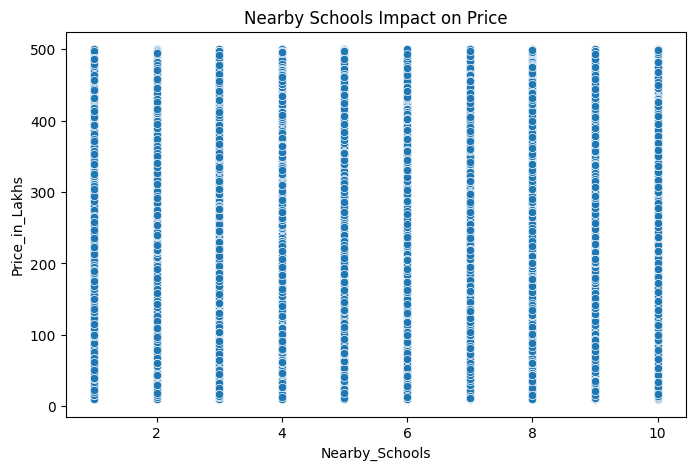

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Nearby_Schools', y='Price_in_Lakhs', data=df)
plt.title("Nearby Schools Impact on Price")
plt.show()


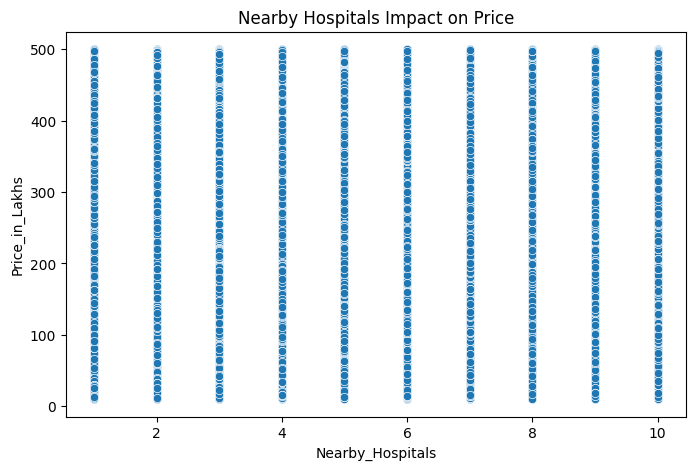

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Nearby_Hospitals', y='Price_in_Lakhs', data=df)
plt.title("Nearby Hospitals Impact on Price")
plt.show()


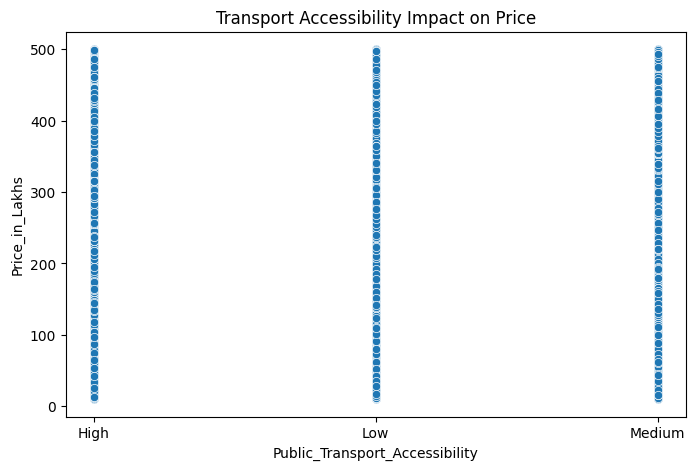

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Public_Transport_Accessibility', y='Price_in_Lakhs', data=df)
plt.title("Transport Accessibility Impact on Price")
plt.show()


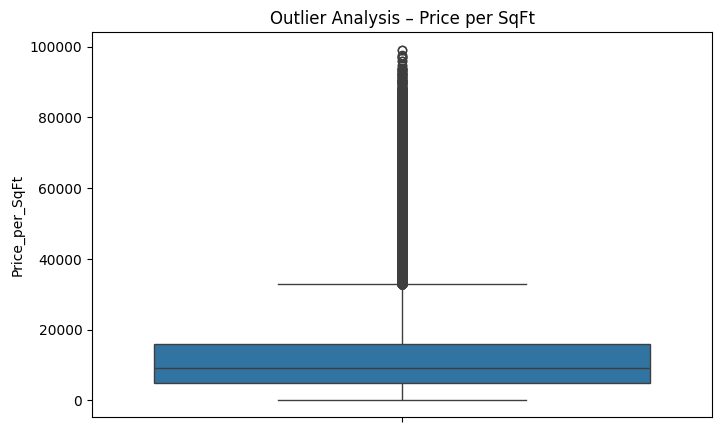

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(df['Price_per_SqFt'])
plt.title("Outlier Analysis – Price per SqFt")
plt.show()


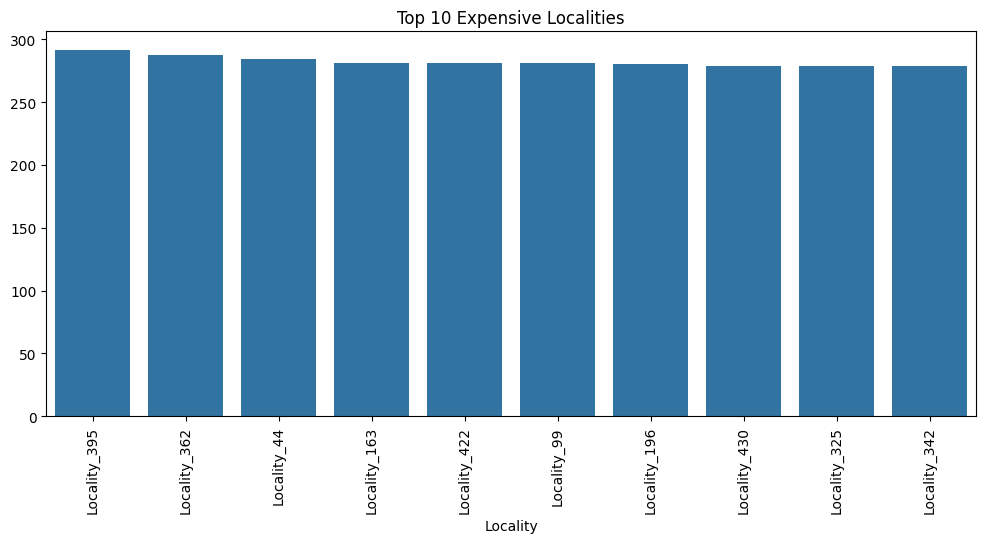

In [27]:
top_localities = df.groupby('Locality')['Price_in_Lakhs'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_localities.index, y=top_localities.values)
plt.xticks(rotation=90)
plt.title("Top 10 Expensive Localities")
plt.show()


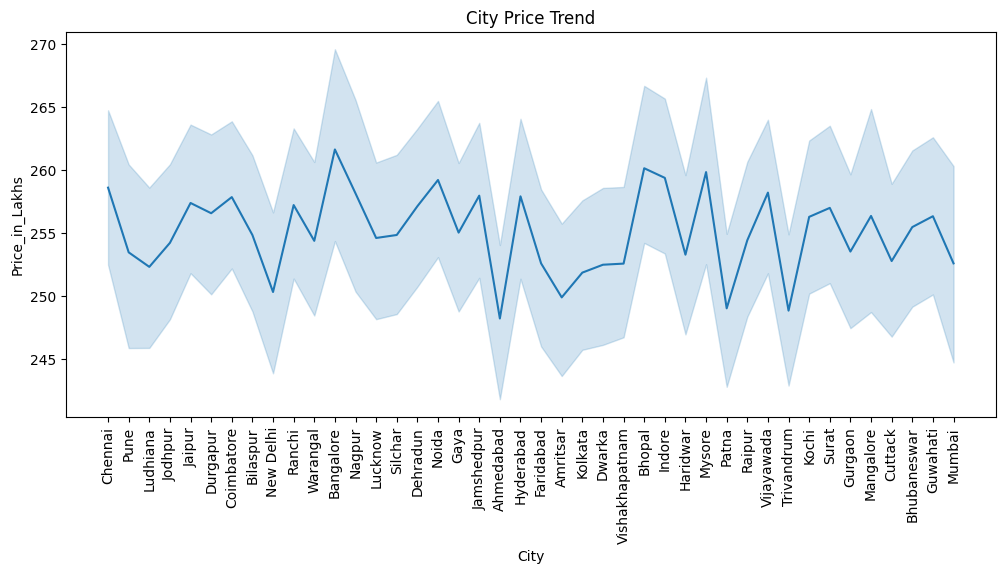

In [28]:
plt.figure(figsize=(12,5))
sns.lineplot(x='City', y='Price_in_Lakhs', data=df)
plt.xticks(rotation=90)
plt.title("City Price Trend")
plt.show()


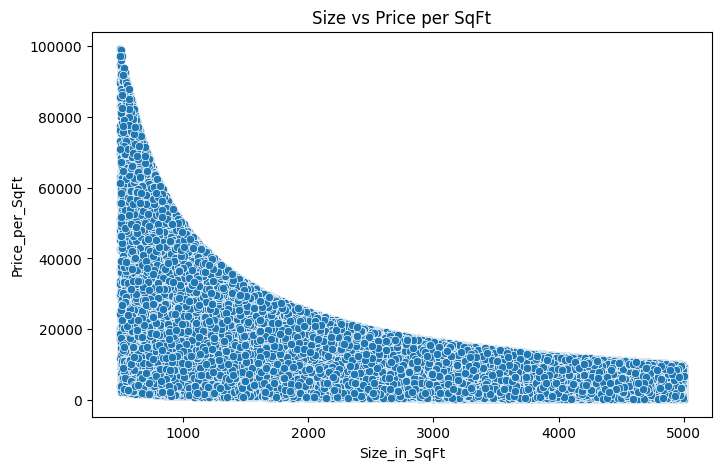

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size_in_SqFt', y='Price_per_SqFt', data=df)
plt.title("Size vs Price per SqFt")
plt.show()


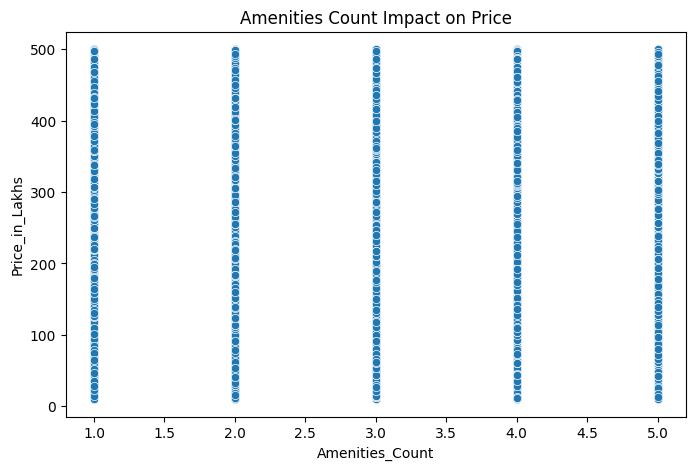

In [30]:
df['Amenities_Count'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))

plt.figure(figsize=(8,5))
sns.scatterplot(x='Amenities_Count', y='Price_in_Lakhs', data=df)
plt.title("Amenities Count Impact on Price")
plt.show()


In [31]:
import pandas as pd
df = pd.read_csv("cleaned_data.csv")
df.head()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Good_Investment,Future_Price
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,10332.489451,1990,...,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,0,719.618119
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,8270.727580,2008,...,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,1,287.283026
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,5046.403075,1997,...,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,1,270.047807
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,10955.490697,1991,...,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,0,441.224528
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,3792.245490,2002,...,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,1,268.740105


In [32]:
from sklearn.model_selection import train_test_split

X_cls = df.drop(['Good_Investment','Price_in_Lakhs','Year_Built'], axis=1)
y_cls = df['Good_Investment']


In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = X_cls.select_dtypes(include='object').columns
numeric_cols = X_cls.select_dtypes(include=['int64','float64']).columns

preprocess = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

clf.fit(X_train_cls, y_train_cls)
print("Classification Model Trained!")


Classification Model Trained!


In [35]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_cls = clf.predict(X_test_cls)
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))


Accuracy: 0.9999370910920986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7979
           1       1.00      1.00      1.00      7917

    accuracy                           1.00     15896
   macro avg       1.00      1.00      1.00     15896
weighted avg       1.00      1.00      1.00     15896



In [38]:
X_reg = df.drop(["Future_Price","Good_Investment","Price_in_Lakhs","Year_Built"], axis=1)
y_reg = df["Future_Price"]

categorical_cols_reg = X_reg.select_dtypes(include='object').columns
numeric_cols_reg = X_reg.select_dtypes(include=['int64','float64']).columns

preprocess_reg = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols_reg),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_reg)
])

In [39]:
from xgboost import XGBRegressor

reg = Pipeline([
    ("preprocess", preprocess_reg),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg.fit(X_train_reg, y_train_reg)
print("Regression Model Trained!")

Regression Model Trained!


In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_reg = reg.predict(X_test_reg)

print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))


RMSE: 5.767046697846976
R² Score: 0.9992251319647002


In [41]:
import joblib

joblib.dump(clf, "investment_model.pkl")
joblib.dump(reg, "future_price_model.pkl")

print("Models saved successfully!")


Models saved successfully!


In [42]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Real Estate Investment Advisor",
                   layout="wide")

# --- Load Models & Data ---
clf = joblib.load("investment_model.pkl")
reg = joblib.load("future_price_model.pkl")
df = pd.read_csv("cleaned_data.csv")

# --- Sidebar Navigation ---
menu = ["Home", "Prediction", "EDA Insights", "Feature Importance"]
choice = st.sidebar.selectbox("Navigation", menu)

# =============================================================
# HOME PAGE
# =============================================================
if choice == "Home":
    st.title("🏠 Real Estate Investment Advisor")
    st.write("""
    This dashboard predicts:
    - Whether a property is a **Good Investment**
    - Future Price after **5 Years**
    - Explore deep **EDA insights**
    - View **Feature Importance**
    """)

# =============================================================
# PREDICTION PAGE
# =============================================================
elif choice == "Prediction":
    st.title("📊 Property Investment Prediction")

    col1, col2 = st.columns(2)

    with col1:
        city = st.selectbox("City", df["City"].unique())
        state = st.selectbox("State", df["State"].unique())
        property_type = st.selectbox("Property Type", df["Property_Type"].unique())
        furnished = st.selectbox("Furnished Status", df["Furnished_Status"].unique())

    with col2:
        bhk = st.selectbox("BHK", sorted(df["BHK"].unique()))
        size = st.number_input("Size (SqFt)", 300, 10000, 1000)
        floor = st.number_input("Floor Number", 0, 50, 1)
        parking = st.selectbox("Parking Space", df["Parking_Space"].unique())
        facing = st.selectbox("Facing", df["Facing"].unique())

    if st.button("Predict Investment & Future Price"):

        sample = pd.DataFrame([{
            "State": state,
            "City": city,
            "Locality": df["Locality"].mode()[0],
            "Property_Type": property_type,
            "BHK": bhk,
            "Size_in_SqFt": size,
            "Furnished_Status": furnished,
            "Floor_No": floor,
            "Total_Floors": df["Total_Floors"].median(),
            "Age_of_Property": df["Age_of_Property"].median(),
            "Nearby_Schools": df["Nearby_Schools"].median(),
            "Nearby_Hospitals": df["Nearby_Hospitals"].median(),
            "Public_Transport_Accessibility": df["Public_Transport_Accessibility"].median(),
            "Parking_Space": parking,
            "Security": df["Security"].mode()[0],
            "Amenities": df["Amenities"].mode()[0],
            "Facing": facing,
            "Owner_Type": df["Owner_Type"].mode()[0],
            "Availability_Status": df["Availability_Status"].mode()[0],
            "Price_per_SqFt": df["Price_per_SqFt"].median()
        }])

        # Predictions
        pred_invest = clf.predict(sample)[0]
        pred_price = reg.predict(sample)[0]

        st.subheader("📌 Prediction Results")
        if pred_invest == 1:
            st.success("✔ This property is a GOOD Investment!")
        else:
            st.error("❌ This property is NOT a good investment")

        st.info(f"💰 Predicted Price after 5 Years: **₹ {pred_price:.2f} Lakhs**")

# =============================================================
# EDA PAGE
# =============================================================
elif choice == "EDA Insights":
    st.title("📈 Data Insights & Analysis")

    tab1, tab2 = st.tabs(["Price & Size Analysis", "City & Locality Trends"])

    with tab1:
        st.subheader("Price Distribution")
        fig1 = plt.figure(figsize=(8,4))
        sns.histplot(df["Price_in_Lakhs"], kde=True)
        st.pyplot(fig1)

        st.subheader("Size Distribution")
        fig2 = plt.figure(figsize=(8,4))
        sns.histplot(df["Size_in_SqFt"], kde=True)
        st.pyplot(fig2)

    with tab2:
        st.subheader("City-wise Avg Price/SqFt")
        fig3 = plt.figure(figsize=(8,4))
        sns.barplot(x="City", y="Price_per_SqFt", data=df)
        plt.xticks(rotation=90)
        st.pyplot(fig3)

        st.subheader("Top 10 Expensive Localities")
        top_localities = df.groupby("Locality")["Price_in_Lakhs"].mean().nlargest(10)
        st.bar_chart(top_localities)

# =============================================================
# FEATURE IMPORTANCE
# =============================================================
elif choice == "Feature Importance":
    st.title("🌟 Model Feature Importance")

    if hasattr(clf.named_steps['model'], "feature_importances_"):
        st.subheader("Classification Model Importance")
        fi = clf.named_steps['model'].feature_importances_
        st.bar_chart(fi[:20])
    else:
        st.warning("Feature importances not available.")


Writing app.py


In [44]:
import os
os.listdir()


['.config',
 'app.py',
 'investment_model.pkl',
 'future_price_model.pkl',
 'cleaned_data.csv',
 'india_housing_prices.csv',
 'sample_data']

In [45]:
!streamlit run app.py --server.address=0.0.0.0 --server.port=8501 &> /content/streamlit_log.txt &


In [47]:
!pip install pyngrok


In [48]:
from pyngrok import ngrok


In [51]:
from pyngrok import ngrok
ngrok.set_auth_token("368iyYDOIw508evt76bRUm9n0SQ_6QmRJ6y5qfXSW8FfcXuTJ")


In [53]:
!streamlit run app.py &>/content/logs.txt &


In [55]:
!pkill -f ngrok


In [57]:
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://fe059e600c23.ngrok-free.app" -> "http://localhost:8501">